#3
The theoretical line is the extact relationship between x and y. This is unrealistic in the real world because there is usually some random unpredictable factors, such as measurement errors, called error. The fitted line adds some random noise to y to make the relationship more realistic. When this process is repeated, the results are slightly different from each line due to different random noises are created every time. This is important because there is an extact relationship that is usually not "true" and also an estimated relationship with some randomness. 

#4
First calculate the intercept and slope using the fitted_model.params. Then plug each x value from the data into the line equation with the intercept and slope from the previously fitted_model.params. These will be the predicted y values.  

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


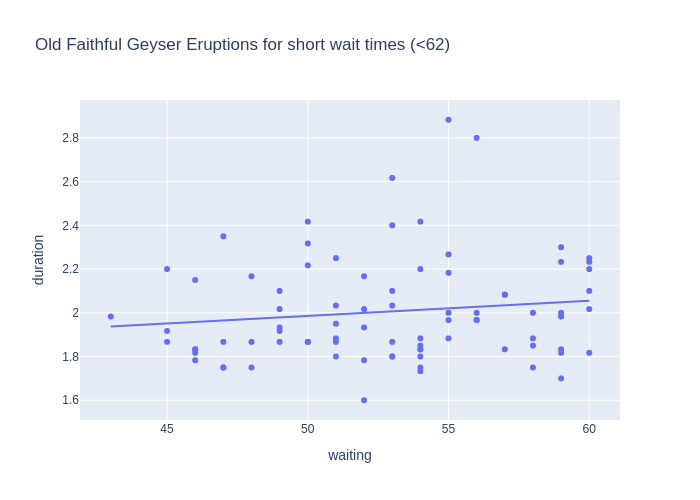

In [11]:
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset("geyser")

# Set the short wait time limit and filter data
short_wait_limit = 62  # Or adjust to 64 or 66 as needed
short_wait = old_faithful.waiting < short_wait_limit

# Fit an OLS model and print the regression summary table
print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration',
                 title="Old Faithful Geyser Eruptions for short wait times (<" + str(short_wait_limit) + ")", 
                 trendline='ols')

fig.show(renderer="png")

#9
First run a linear regression to create a best fit line of the waiting time and eruption duration to help see if there is a consistent pattern between them. The slope for waiting, which in this case is 0.0069, shows how much eruption duration is expected to change for each additional minute of wait time. The p-value for waiting is 0.238. This is greater than 0.05, which suggests that there is no strong evidence of a relation between waiting time and eruption duration within shorter wait times. 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


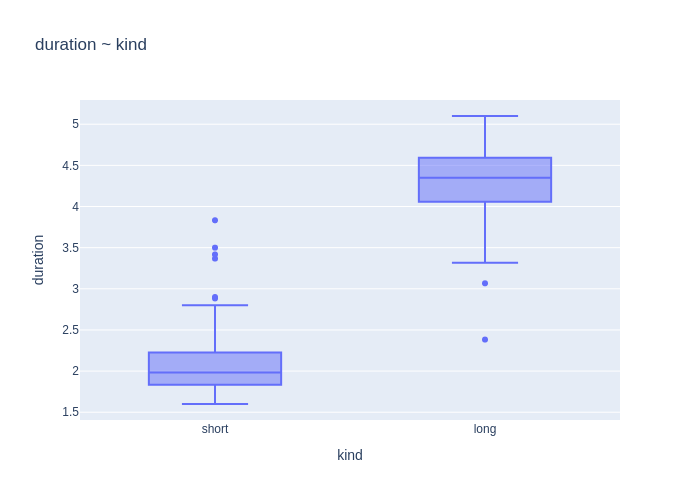

In [12]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

#11
The big picture differences between the two are that the new model focuses on whether the average duration differs between the short and long wait groups, while the previous model considers wait time as a continuous variable. Using a continuous variable shows flexibility, while the new model only tells the two broad categories. For the new model, it gives clearer evidence of a difference in duration on wait time length to interpret. 

The p-value is 0.000, showing that this difference is statisitcally significant. This is strong evidence to reject the null hypothesis. The condifence interval ranges from 2.101 to 2.396, which means that there is 95% confidence that the true difference in average duration between long and short waits are between this range. 

Here is the link to chat log
https://chatgpt.com/c/672d8c10-faa4-8007-aa94-be59305d6a67